<a href="https://colab.research.google.com/github/Parvfect/SINDy/blob/main/autoencoders_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using autoencoders to learn a compressed version of the MNIST *dataset*

Following - https://blog.keras.io/building-autoencoders-in-keras.html

Inspired by - http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/

Neural Networks, Manifolds and Topology

In [1]:
import keras
from keras import layers

In [2]:
encoding_dim = 32

input_img = keras.Input(shape =(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

Looks like we're gonna input an image, fold it over itself and then make it pass through a bottleneck

In [3]:
# Creating seperate retrivable encoder, decoder models as well as checkpoints
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape = (encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [4]:
# Training our autoencoder to reconstruct MNIST digits

# Compiling the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
# Inputting the data
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [6]:
# Normalize all the values between 0 and 1 and flatten the 28x28 images 
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


""
It is most common to use 32-bit precision when training a neural network, so at one point the training data will have to be converted to 32 bit floats. Since the dataset fits easily in RAM, we might as well convert to float immediately.

Regarding the division by 255, this is the maximum value of a byte (the input feature's type before the conversion to float32), so this will ensure that the input features are scaled between 0.0 and 1.0. This is not compulsory, but I usually prefer to have input features about that scale so that the default learning rate (and other hyperparameters) work reasonably well, and so that the cost can take on reasonable values that I am used to. For example, suppose the scale is 100 times the scale you are used to, then the learning rate should be 100 times smaller than you are used to, and the loss will be larger than usual (if it is the mean squared error, the loss will likely be 100^2=10000 times larger than you are used to).
""

In [7]:
# Training autoencoder for 50 epochs
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data = (x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 4ms/step - loss: 0.2778 - val_loss: 0.1904
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1714 - val_loss: 0.1540
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1449 - val_loss: 0.1341
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1292 - val_loss: 0.1219
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1192 - val_loss: 0.1138
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1122 - val_loss: 0.1080
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1072 - val_loss: 0.1038
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1036 - val_loss: 0.1009
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1007 - val_loss: 0.0983
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0985 - val_loss: 0.0965

In [8]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


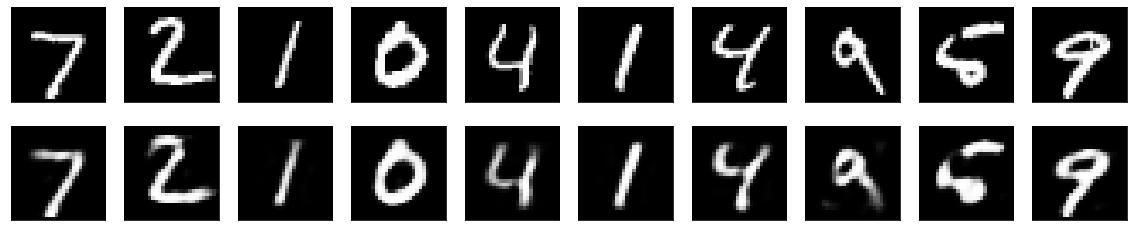

In [9]:
# Let us vizualise the reconstructred inputs and the encoded representations using matplotlib

import matplotlib.pyplot as plt

n=10  # Number of digits to display

plt.figure(figsize=(20, 4))

for i in range(n):
  # Display original
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Display reconstruction
  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## Adding a sparsity constraint on the encoded representation

Let's try creating the same effects, but instead of making it go through a bottleneck, we will try to limit the number of activations used

In [10]:
from keras import regularizers

encoding_dim = 150

input_img = keras.Input(shape=(784,))

# Add a dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation = 'relu', 
                       activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

Epoch 1/50
235/235 [==============================] - 2s 4ms/step - loss: 0.2261 - val_loss: 0.1469
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1308 - val_loss: 0.1165
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1107 - val_loss: 0.1038
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1012 - val_loss: 0.0970
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0956 - val_loss: 0.0928
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0921 - val_loss: 0.0900
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0895 - val_loss: 0.0879
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0876 - val_loss: 0.0862
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0860 - val_loss: 0.0849
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0848 - val_loss: 0.0838

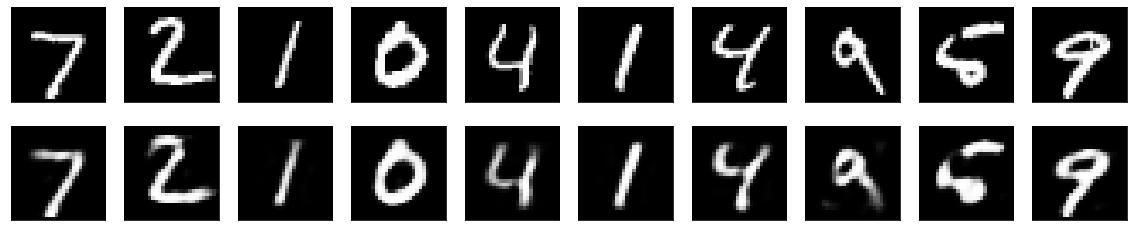

In [11]:
sparse_autoencoder = keras.Model(input_img, decoded)
sparse_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
sparse_autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data = (x_test, x_test))
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n=10  # Number of digits to display

plt.figure(figsize=(20, 4))

for i in range(n):
  # Display original
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Display reconstruction
  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## Deep Autoencoder

In [12]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [13]:
deep_autoencoder = keras.Model(input_img, decoded)
deep_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

deep_autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 2s 5ms/step - loss: 0.2477 - val_loss: 0.1705
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1552 - val_loss: 0.1417
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1347 - val_loss: 0.1272
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1248 - val_loss: 0.1200
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1189 - val_loss: 0.1151
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1146 - val_loss: 0.1114
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1114 - val_loss: 0.1092
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1089 - val_loss: 0.1064
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1066 - val_loss: 0.1048
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1044 - val_lo

In [14]:
def display_results(decoded_imgs):
  n=10  # Number of digits to display
  plt.figure(figsize=(20, 4))

  for i in range(n):
    # Display original
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

## Convolutional Autoencoder

Practically, autoencoders applied to images are always convolutional in nature, because they simply perform better. 

Encoder will consist in a stack of Conv2D and MaxPooling2D layers and decoder will consist in a stack of Conv2D and UpSampling2Dlayers

In [15]:

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(8, (3,3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2,2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

convolutional_autoencoder = keras.Model(input_img, decoded)
convolutional_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [16]:
# Loading the data and making it compatible with our conv network
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [17]:
# Visualizing results during training - tensorboard
!tensorboard --logdir=/tmp/autoencoder


^C


In [ ]:
from keras.callbacks import TensorBoard

convolutional_autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
               )

Epoch 1/50


## Application to image denoising

## Sequence to Sequence autoencoder

## Variational Autoencoder